# ArcGIS and IBM Watson 
## Machine Learning Integration for Pedestrian Activity Classification

![Machine Learning Integration](../img/integration2.jpg)

# 1. Retrieve Training Data from Survey123

# 2. Retrieve Models from IBM Watson

In [1]:
import os
from watson_developer_cloud import VisualRecognitionV3
import json
from IPython.display import Image
from IPython.core.display import HTML 
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
visual_recognition = VisualRecognitionV3(
    '2018-03-19',
    iam_api_key=os.environ['BLUEMIX_API_KEY'])

In [3]:
visual_recognition.list_classifiers(verbose=True)

{'classifiers': [{'classes': [{'class': 'low'},
    {'class': 'medium'},
    {'class': 'high'}],
   'classifier_id': 'Esri_Classification_CobbCounty_1492191311',
   'core_ml_enabled': True,
   'created': '2018-06-29T16:49:13.296Z',
   'name': 'Esri_Classification_CobbCounty_Cam129_v2',
   'owner': '52d3c878-5f0a-44c6-b191-358d19be7bc5',
   'status': 'ready',
   'updated': '2018-06-29T16:49:13.296Z'},
  {'classes': [{'class': 'low'}, {'class': 'medium'}, {'class': 'high'}],
   'classifier_id': 'Esri_Classification_CobbCounty_371717976',
   'core_ml_enabled': True,
   'created': '2018-06-26T15:08:09.890Z',
   'name': 'Esri_Classification_CobbCounty_Cam130',
   'owner': '52d3c878-5f0a-44c6-b191-358d19be7bc5',
   'status': 'ready',
   'updated': '2018-06-26T15:08:09.890Z'},
  {'classes': [{'class': 'low'}, {'class': 'medium'}, {'class': 'high'}],
   'classifier_id': 'Esri_Classification_CobbCounty_1653483892',
   'core_ml_enabled': True,
   'created': '2018-06-29T16:48:56.598Z',
   'name':

In [4]:
classifier_name = 'Esri_Classification_CobbCounty_Cam128_v2'
classifier_id = None

for classifier in visual_recognition.list_classifiers()['classifiers']:    
    if classifier['name'] == classifier_name:
        classifier_id = classifier['classifier_id']

print(classifier_id)

Esri_Classification_CobbCounty_1653483892


In [5]:
test_images_dir = "{0}\\TestData\\128".format(os.getcwd())
high_dir = "{0}\\{1}".format(test_images_dir, "High")
med_dir = "{0}\\{1}".format(test_images_dir, "Medium")
low_dir = "{0}\\{1}".format(test_images_dir, "Low")
high_img_path = "{0}\\{1}".format(high_dir, os.listdir(high_dir)[0])
med_img_path = "{0}\\{1}".format(med_dir, os.listdir(med_dir)[0])
low_img_path = "{0}\\{1}".format(low_dir, os.listdir(low_dir)[0])

# 3. Test Classification on Sample Images

## Low Pedestrian Density Sample

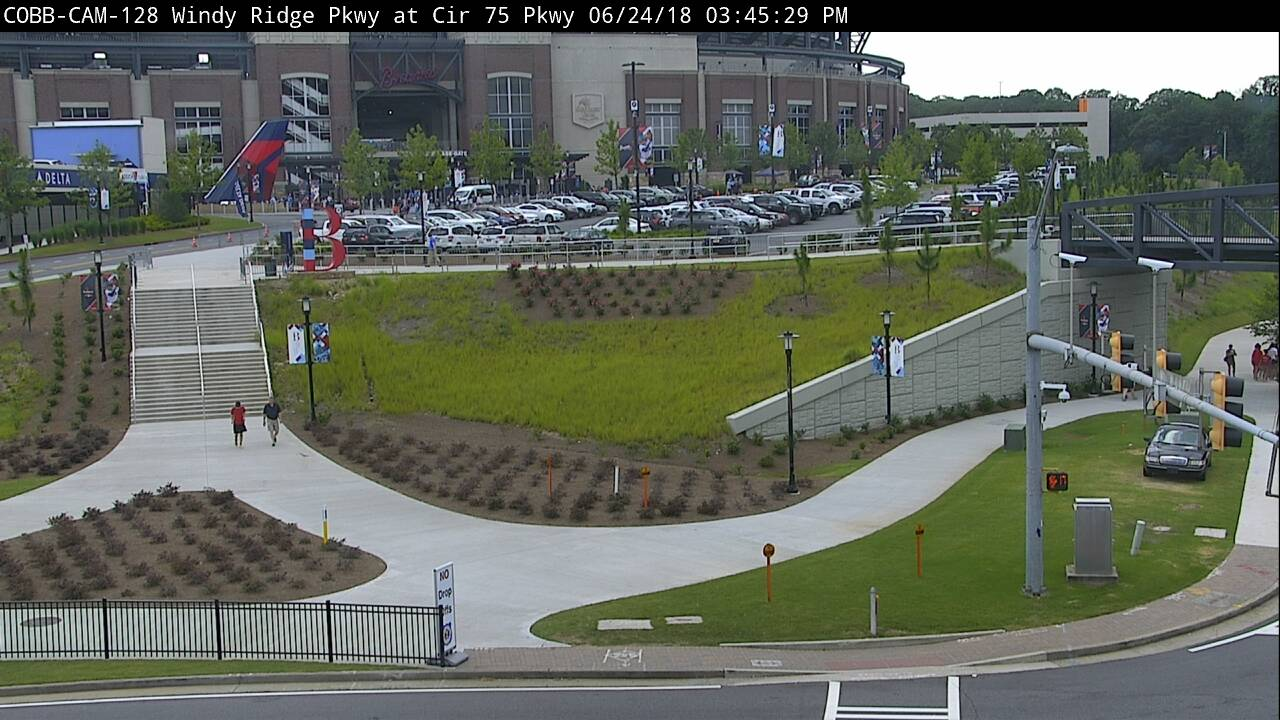

In [20]:
Image(filename= low_img_path)

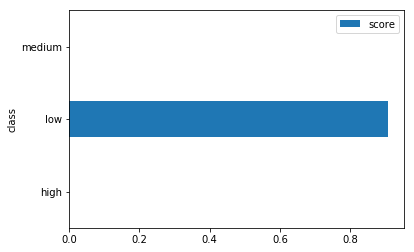

In [21]:
with open(low_img_path, 'rb') as images_file:
    classes = visual_recognition.classify(
        images_file,
        threshold='0.0',
        classifier_ids=classifier_id)
#     print(json.dumps(classes, indent=2))
    output_classes = classes['images'][0]['classifiers'][0]['classes']
    df = pd.DataFrame(data=output_classes)
    df = df.set_index('class')
    df.plot(kind='barh')

## Medium Pedestrian Density Sample

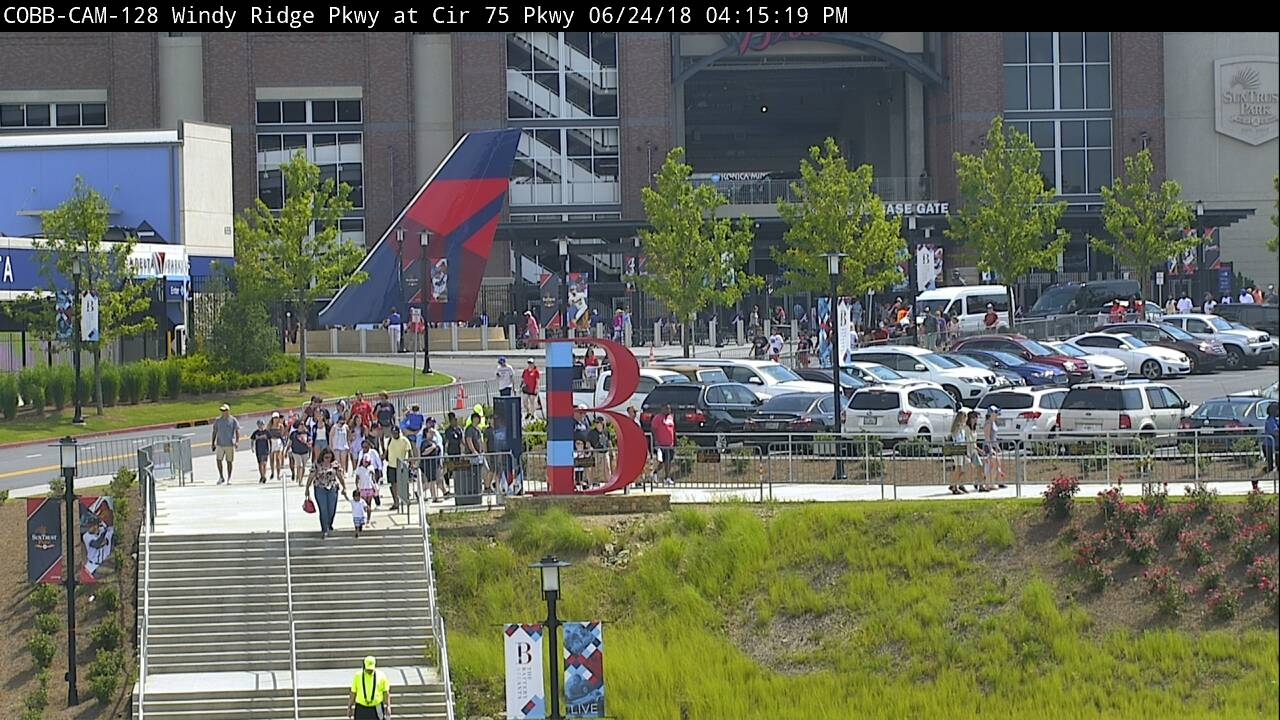

In [22]:
Image(filename= med_img_path)

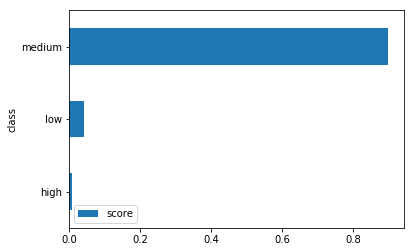

In [23]:
with open(med_img_path, 'rb') as images_file:
    classes = visual_recognition.classify(
        images_file,
        threshold='0.0',
        classifier_ids=classifier_id)
#     print(json.dumps(classes, indent=2))
    output_classes = classes['images'][0]['classifiers'][0]['classes']
    df = pd.DataFrame(data=output_classes)
    df = df.set_index('class')
    df.plot(kind='barh')    

## High Pedestrian Density Sample

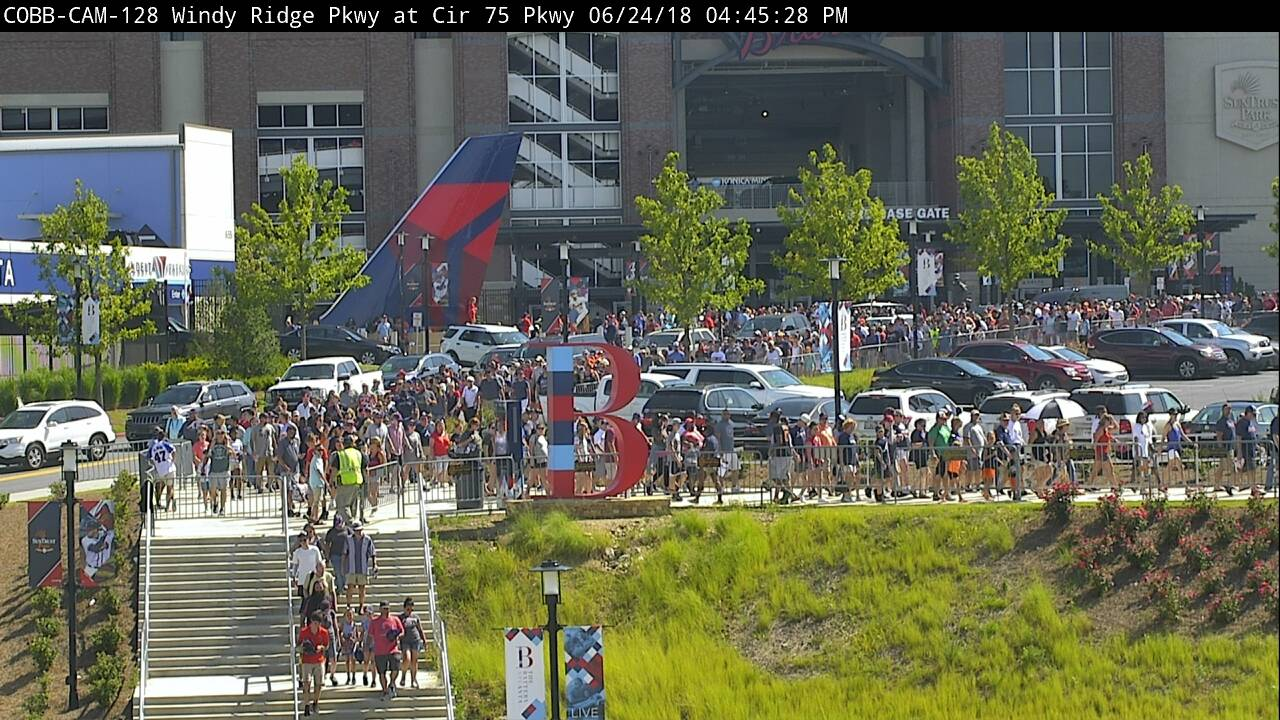

In [24]:
Image(filename= high_img_path)

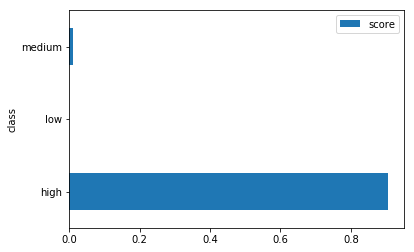

In [25]:
with open(high_img_path, 'rb') as images_file:
    classes = visual_recognition.classify(
        images_file,
        threshold='0.0',
        classifier_ids=classifier_id)
#     print(json.dumps(classes, indent=2))
    output_classes = classes['images'][0]['classifiers'][0]['classes']
    df = pd.DataFrame(data=output_classes)
    df = df.set_index('class')
    df.plot(kind='barh')    